In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Player data.csv')

In [5]:
class MyClass:

    def __init__(self, my_dataframe):
        self.my_dataframe = my_dataframe
    
    def shootingPercentage_per36(self,p1,p2,season):

        def get_data(player,season):

            percentage_3 = list(df[(df['Season']==season)&(df['Player']==player)&(df['3ptsA']!=0)]['3pts%'])
            shot_3 = ['3pts%']*len(percentage_3)
            temp = df[(df['Season']==season)&(df['Player']==player)]
            percentage_2 = list((temp['FG']-temp['3pts'])/(temp['FGA']-temp['3ptsA']))
            shot_2 = ['2pts%']*len(percentage_2)
            percentage_1 = list(df[(df['Season']==season)&(df['Player']==player)&(df['3ptsA']!=0)]['FT%'])
            shot_1 = ['FT%']*len(percentage_1)
            percentage = percentage_1
            for i in [percentage_2,percentage_3]:
                percentage.extend(i)
            shot = shot_1
            for i in [shot_2,shot_3]:
                shot.extend(i)
            df_temp = pd.DataFrame([percentage,shot],index=['Shooting Percentage','Shot Type']).T
            df_temp['Name'] = player
            df_temp = df_temp[df_temp['Shooting Percentage'] != np.float('nan')]
            return df_temp
        
        play_1 = get_data(p1,season)
        play_2 = get_data(p2,season)
        frames = [play_1,play_2]
        df_final = pd.concat(frames)
        df_final = df_final.reset_index(drop=True)
        df_final = df_final.dropna()
        df_final['Shooting Percentage'] = df_final['Shooting Percentage'].apply(lambda x: float(x))
        
        sns.set_style("whitegrid",{'axes.grid': False})
        plt.figure(figsize=(12, 6))
        pl = sns.violinplot(y="Shooting Percentage", x="Shot Type", scale='width',inner="quart", hue="Name", cut = 0, split=True, data=df_final, palette={p1:'#00275D',p2:'#FFC633'},legend=False)
        plt.legend(loc='upper center')
        hfont = {'fontname':'Arial','size':'large'}
        plt.title('Comparison of shooting percentage between {} and {} for the {}-{} season\n'.format(p1,p2,season-1,season),**hfont)
        sns.despine(offset=10, trim=True,left=True)

        return pl
                         


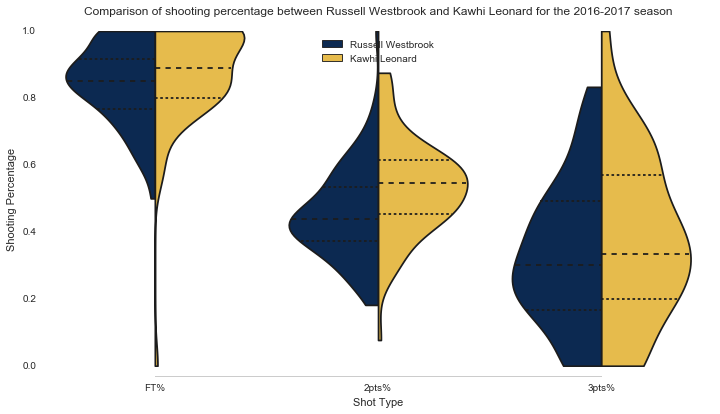

In [7]:
comparison = MyClass(df)
comparison.shootingPercentage_per36('Russell Westbrook','Kawhi Leonard',2017)